### Import the libraries
To read the Train and Test Images

In [1]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import sys
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


### User defined function
To read the WBC images and resize them to 80x80 resolution.

In [2]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 0
            elif wbc_type in ['EOSINOPHIL']:
                label = 1
            elif wbc_type in ['MONOCYTE']:
                label = 2
            elif wbc_type in ['LYMPHOCYTE']:
                label = 3

            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, (80, 80))
                    img_arr = np.asarray(img_file)                    
                    if label<4:
                        X.append(img_arr)
                        y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

### Create Train and Test Dataset
creating the input and output matrixes for Train and Test Dataset and also Checking the size of the dataset

In [3]:
X_train, y_train = get_data('bccd_wbc_seg/TRAIN/')
X_test, y_test = get_data('bccd_wbc_seg/TEST/')
print('Type:', X_train.dtype, '\nMemory size of X_train: ', str(sys.getsizeof(X_train)/1024/1024/1024) + ' GB')
print('Type:', X_test.dtype, '\nMemory size of X_test: ', str(sys.getsizeof(X_test)/1024/1024/1024) + ' GB')
y_trainHot = to_categorical(y_train, num_classes = 4)
y_testHot = to_categorical(y_test, num_classes = 4)

100%|███████████████████████████████████████████████████████████████████████████████| 672/672 [00:02<00:00, 294.88it/s]

Type: uint8 
Memory size of X_train:  0.18249763548374176 GB
Type: uint8 
Memory size of X_test:  0.04574073851108551 GB


### Checking Shape of Dataset
Checking train and test dataset shape and showing a sample image

Train Data Size:  (10206, 80, 80, 3)
Test Data Size:  (2558, 80, 80, 3)


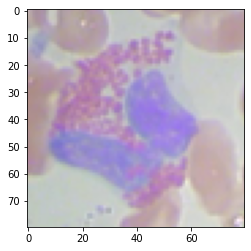

In [4]:
print('Train Data Size: ', X_train.shape)
print('Test Data Size: ', X_test.shape)
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB))
plt.show()

### Converting Range of RGB Image
Converting RGB values of the images from the range of  0-255 (`uint8_t`) to 0-1 (`float64_t`)

In [5]:
X_train = np.array(X_train)
X_train = X_train/255.0
print('Type:', X_train.dtype, '\nMemory size of X_train: ', str(sys.getsizeof(X_train)/1024/1024/1024) + ' GB')
X_test = np.array(X_test)
X_test = X_test/255.0
print('Type:', X_test.dtype, '\nMemory size of X_test: ', str(sys.getsizeof(X_test)/1024/1024/1024) + ' GB')

Type: float64 
Memory size of X_train:  1.4599801450967789 GB
Type: float64 
Memory size of X_test:  0.36592496931552887 GB


### Shuffle Trainng Dataset
Shuffling the training input and output dataset

In [6]:
listIdx = list(range(0, len(X_train)))
np.random.shuffle(listIdx)
X_train = X_train[listIdx]
y_trainHot = y_trainHot[listIdx]

### Now Save Dataset as ".npz" file

In [7]:
fileName = 'eswa_train_test_bccdwbc_seg_80x80'
np.savez(fileName + '.npz', X_train=X_train, y_trainHot=y_trainHot, X_test=X_test, y_testHot=y_testHot)